# Displaying point sets (3-D)

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cvxopt
from cvxopt import matrix, printing

In [69]:
def get_translation_matrix(tx: float = 0, ty: float = 0, tz: float = 0) -> np.ndarray:
    """ construct a scaling matrix.
    input
        tx: x-translation (float)
        ty: y-translation (float)
        tz: z-translation (float)
    output
        4x4 rotation matrix  (3-D translation in homogeneous coordinates)
    """

    # 3-D translation in homogeneous coordinates
    T = np.array([[1, 0, 0, tx],
                  [0, 1, 0, ty],
                  [0, 0, 1, tz],
                  [0, 0, 0, 1]])
        
    return T

In [70]:
def get_scaling_matrix(sx: float = 1, sy: float = 1, sz: float = 1) -> np.ndarray:
    """ construct a scaling matrix.
    input
        sx: scaling factor for x dimension(float)
        sy: scaling factor for y dimension(float)
        sz: scaling factor for z dimension(float)
    output
        4x4 scaling matrix  (3-D scaling in homogeneous coordinates)
    """

    # 3-D scaling in homogeneous coordinates
    S = np.array([[sx, 0, 0, 0],
                  [0, sy, 0, 0],
                  [0, 0, sz, 0],
                  [0, 0, 0, 1]])
        
    return S

In [71]:
import numpy as np

def get_rotation_matrix(angle: float, axis_name=None) -> np.ndarray:
    """Calculate single rotation of theta matrix around x, y, or z.
    Inputs:
        angle: rotation angle in degrees
        axis_name: 'x', 'y', or 'z'
    Output:
        4x4 rotation matrix
    """
    
    # Convert angle from degrees to radians.
    theta = angle * np.pi / 180

    # Pre-calculate the cosine and sine values
    c = np.cos(theta)
    s = np.sin(theta)

    # Select the correct rotation matrix for each axis: x, y, or z.
    if axis_name == 'x':
        rotation_matrix = np.array([[1, 0,  0, 0],
                                    [0, c, -s, 0],
                                    [0, s,  c, 0],
                                    [0, 0,  0, 1]])
    elif axis_name == 'y':
        rotation_matrix = np.array([[ c, 0, s, 0],
                                    [ 0, 1, 0, 0],
                                    [-s, 0, c, 0],
                                    [ 0, 0, 0, 1]])
    elif axis_name == 'z':
        rotation_matrix = np.array([[c, -s, 0, 0],
                                    [s,  c, 0, 0],
                                    [0,  0, 1, 0],
                                    [0,  0, 0, 1]])
    elif axis_name is None:
        rotation_matrix = np.eye(4)  # Identity matrix

    return rotation_matrix

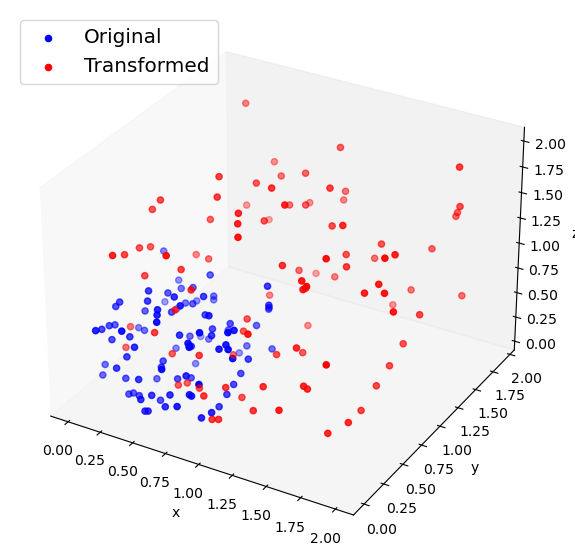

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize3D(X: np.ndarray, 
                Y: np.ndarray, 
                ax):
    """
    Plots two pointsets using scatter plot. Its goal is to show the
    difference between the original shape and its transformed
    version.

    Parameters
    ----------
    X: numpy.ndarray, shape=(3, N)
        3 x N array containing the (x,y,z) coordinates of the shape 

    Y: numpy.ndarray, shape=(3, N)
        3 x N array containing the (x,y,z) coordinates of the other shape

    ax: The 3D axis to plot on.

    Returns
    -------
    Nothing.
    """
    
    plt.cla()  # Clear the current axes.
    ax.scatter(X[0, :],  X[1, :], X[2, :], color='blue', label='Original')
    ax.scatter(Y[0, :],  Y[1, :], Y[2, :], color='red', label='Transformed')
    ax.legend(loc='upper left', fontsize='x-large')
    ax.grid(False)
    ax.set_xlabel('x') 
    ax.set_ylabel('y') 
    ax.set_zlabel('z') 
    plt.draw()

# Example usage
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create example data
N = 100  # Number of points
X = np.random.rand(3, N)  # Original shape
Y = X * 2  # Transformed shape (scaled)

visualize3D(X, Y, ax)
plt.show()

In [73]:
def homogeneous2cartesian(X_h: np.ndarray) -> np.ndarray:
    """Converts the coordinates of a set of 3-D points from 
    homogeneous coordinates to Cartesian coordinates. 

    Args:
      X_h: MxN np.ndarray (float) containing N points in homogeneous coords.  
           Each point is a column of the matrix.

    Returns:
      X_c: (M-1)xN np.ndarray (float) in Cartesian coords. 
           Each point is a column of the matrix.
      
    """    

    # Number of rows (dimension of points). 
    nrows = X_h.shape[0]
    
    # Divide each coordinate by the last to convert point set from homogeneous to Cartesian 
    # (using vectorized calculation for speed and concise code)
    X_c = X_h[0:nrows-1,:] / X_h[-1,:]

    return X_c

In [74]:
def cartesian2homogeneous(X_c: np.ndarray) -> np.ndarray:
    """Converts the coordinates of a set of 3-D points from 
    Cartesian coordinates to homogeneous coordinates. 

    Args:
      X_c: M x N np.ndarray (float). It contains N points in M-dimensional space. 
           Each point is a column of the matrix.

    Returns:
      X_h: (M+1) x N np.ndarray (float) in homogeneous coords. It contains N points in (M+1)-dimensional space. 
           Each point is a column of the matrix.
      
    """    

    # Number of columns (number of points in the set). 
    ncols = X_c.shape[1]
    
    # Add an extra row of 1s in the matrix. 
    X_h = np.block([[X_c],
                   [ np.ones((1, ncols))]])

    return X_h

In [75]:
# Load points from file
X = np.loadtxt('bunny.txt')
# X = np.loadtxt('chopper.txt')
X.shape

(453, 3)

In [76]:
printing.options['dformat'] = '%.2f'
printing.options['width'] = -1
print('X = ')
print(matrix(X[0:5][:]))

X = 
[-0.03  0.13  0.01]
[-0.04  0.13  0.01]
[-0.07  0.14  0.04]
[-0.01  0.13  0.02]
[-0.02  0.13  0.01]



In [77]:
# Transpose so points are columns in the data matrix 
Xt = X.transpose()
Xt.shape

(3, 453)

In [78]:
# Print the first few columns of the data matrix 
print('Xt = ')
print(matrix(Xt[:,0:5]))

Xt = 
[-0.03 -0.04 -0.07 -0.01 -0.02]
[ 0.13  0.13  0.14  0.13  0.13]
[ 0.01  0.01  0.04  0.02  0.01]



In [79]:
printing.options['dformat'] = '%.2f'
printing.options['width'] = -1
np.set_printoptions(precision=2)

# Scaling
S = get_scaling_matrix(1.2, 1.5, -1.2)
print('\n')
print('Scaling')
print('--------------------------------')
print('S = ')
print(matrix(S))

# Rotation
R = get_rotation_matrix(90, axis_name = 'x')     # Rotation 
print('\n')
print('Rotation')
print('--------------------------------')
print('R = ')
print(matrix(R))

# Translation
T = get_translation_matrix(0.1, 0.2, -0.1)
print('\n')
print('Translation')
print('--------------------------------')
print('T = ')
print(matrix(T))



Scaling
--------------------------------
S = 
[ 1.20  0.00  0.00  0.00]
[ 0.00  1.50  0.00  0.00]
[ 0.00  0.00 -1.20  0.00]
[ 0.00  0.00  0.00  1.00]



Rotation
--------------------------------
R = 
[ 1.00  0.00  0.00  0.00]
[ 0.00  0.00 -1.00  0.00]
[ 0.00  1.00  0.00  0.00]
[ 0.00  0.00  0.00  1.00]



Translation
--------------------------------
T = 
[ 1.00  0.00  0.00  0.10]
[ 0.00  1.00  0.00  0.20]
[ 0.00  0.00  1.00 -0.10]
[ 0.00  0.00  0.00  1.00]



In [80]:
import numpy as np

def apply_transformation(X, H): 
    """Transforms object using a compound transformation.

    Args:
      X: 3 x N np.ndarray (float). It contains N points in 3-dimensional space 
                  in Cartesian coordinates. Each point is a column of the matrix.

      H: 4x4 Transformation matrix in homogeneous coordinates to be applied to the point set.     

    Returns:
      Y:  3 x N np.ndarray (float). It contains N points in 3-dimensional space 
                      in Cartesian coordinates. Each point is a column of the matrix.
    """
    
    # Convert points to Homogeneous coords before transforming them
    ones_row = np.ones((1, X.shape[1]))  # Create a row of ones with the same number of columns as X
    X_homogeneous = np.vstack((X, ones_row))  # Stack the ones row below X to convert to homogeneous coordinates
    
    # Apply transformation
    Y_homogeneous = np.dot(H, X_homogeneous)  # Multiply H by X_homogeneous to apply the transformation
    
    # Convert points back to Cartesian coords
    Y = Y_homogeneous[0:3, :] / Y_homogeneous[3, :]  # Divide the first three rows by the fourth row for each column
    
    return Y

In [81]:
# Rotation, Translation, and Scale (in this order)
T1 = R @ T @ S

Y1 = apply_transformation(Xt, T1)

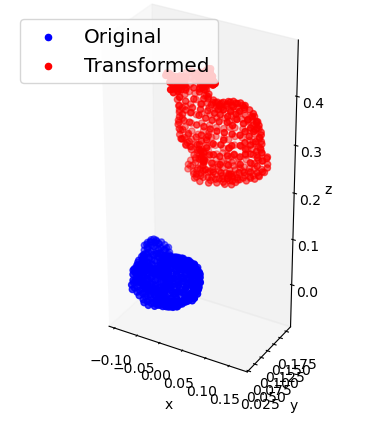

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
visualize3D(Xt, Y1, ax=ax)
ax.set_aspect("equal")
plt.show(block=False)

In [83]:
# Translation, Rotation, and Scaling (in this order)
T2 = T @ R @ S

Y2 = apply_transformation(Xt, T2)

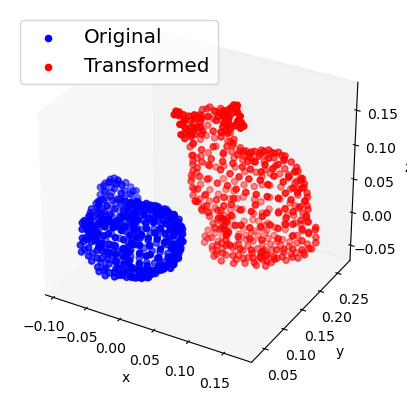

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
visualize3D(Xt, Y2, ax=ax)
ax.set_aspect("equal")
plt.show(block=False)

In [85]:
# Scaling, Translation, and Rotation (in this order)
T3 = S @ T @ R

Y3 = apply_transformation(Xt, T3)

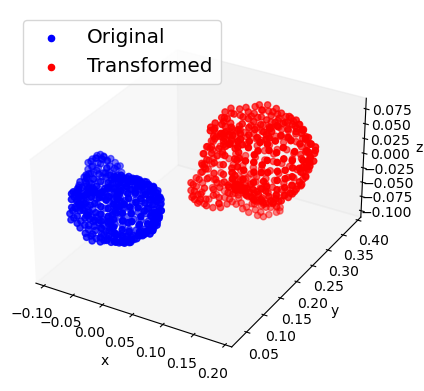

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
visualize3D(Xt, Y3, ax=ax)
ax.set_aspect("equal")


plt.show(block=False)